In [75]:
import pandas as pd
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, f1_score
from sklearn.dummy import DummyClassifier

In [2]:
with open('GBmapper.pkl', 'rb') as open_file:
    mapper = pkl.load(open_file)

In [3]:
with open('observations.pkl', 'rb') as open_file:
    df = pkl.load(open_file)

In [4]:
with open('monday_best_estimator.pkl', 'rb') as open_file:
    est = pkl.load(open_file)

In [5]:
X = mapper.fit_transform(df)

In [6]:
y = df['funded']

In [7]:
dummy = DummyClassifier()
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [8]:
y_pred = est.predict(X)
y_dummy = dummy.predict(X)

In [9]:
gbconf = confusion_matrix(y, y_pred)
gbconf

array([[  423,  3751],
       [  260, 18323]])

In [10]:
dummyconf = confusion_matrix(y, y_dummy)
dummyconf

array([[  736,  3438],
       [ 3409, 15174]])

In [80]:
print(accuracy_score(y,y_pred))

0.8237465395262996


In [81]:
print(accuracy_score(y,y_pred_new))

0.6730676275431735


In [79]:
print(accuracy_score(y,y_dummy))

0.6991255437887244


In [11]:
y_proba = est.predict_proba(X)[:,1]

In [12]:
y_pred_new = [1 if y > 0.8 else 0 for y in y_proba]

In [13]:
spap = confusion_matrix(y, y_pred_new)
spap

array([[ 2879,  1295],
       [ 6145, 12438]])

In [14]:
roc_auc_score(y, y_proba)

0.7489921091405628

In [15]:
cols = mapper.transformed_names_

In [22]:
cols = [x.replace('_', ' ').title() for x in cols]
cols

['Project Cost',
 'Perc Lunch',
 'Grade Level Grades 3-5',
 'Grade Level Grades 6-8',
 'Grade Level Grades 9-12',
 'Grade Level Grades Prek-2',
 'Grade Level Unknown',
 'Metro Rural',
 'Metro Suburban',
 'Metro Town',
 'Metro Unknown',
 'Metro Urban',
 'Subject Category Applied Learning',
 'Subject Category Care & Hunger',
 'Subject Category Health & Sports',
 'Subject Category History & Civics',
 'Subject Category Literacy & Language',
 'Subject Category Math & Science',
 'Subject Category Music & The Arts',
 'Subject Category Special Needs',
 'Subject Category Warmth',
 'Subject Subcategory Applied Sciences',
 'Subject Subcategory Care & Hunger',
 'Subject Subcategory Character Education',
 'Subject Subcategory Civics & Government',
 'Subject Subcategory College & Career Prep',
 'Subject Subcategory Community Service',
 'Subject Subcategory Esl',
 'Subject Subcategory Early Development',
 'Subject Subcategory Economics',
 'Subject Subcategory Environmental Science',
 'Subject Subcate

In [24]:
cols[1] = "Percentage Free Lunch"

In [37]:
cols[-1] = "Number of Items Purchased"

In [38]:
imps = est.feature_importances_

In [39]:
import matplotlib.pyplot as plt

In [40]:
sorted_imps = sorted(list(zip(cols, imps)), key=lambda a: a[1], reverse=False)

In [41]:
import seaborn as sns

sns.set_style('dark')

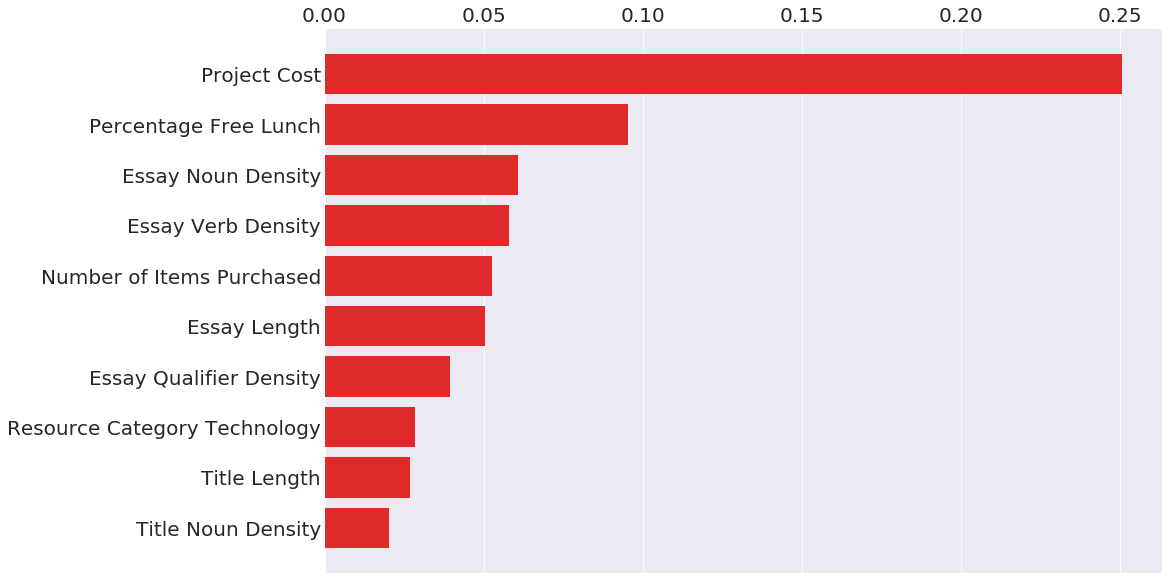

In [69]:
fig, ax = plt.subplots(figsize=[15,10])
plt.barh([x[0] for x in sorted_imps[-10:]], [x[1] for x in sorted_imps[-10:]], color='#e02a2a')
ax.xaxis.tick_top()
plt.xticks(size='20')
plt.yticks(size='20')
ax.grid(color='white', axis='x')

In [36]:
import numpy as np
import itertools

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=[10,7])
    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    #plt.title(title, fontsize=30)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20, color='#373737')
    plt.yticks(tick_marks, classes, fontsize=20, color='#373737')
    '''plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False)''' # labels along the bottom edge are off

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=40,
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "#373737")

    plt.tight_layout()
    #plt.ylabel('Actual', fontsize=25, rotation=0, color='#373737')
    plt.xlabel('Predicted', fontsize=25, color='#373737')

Plots for threshold >0.8

Normalized confusion matrix
[[0.17632966 0.82367034]
 [0.18344724 0.81655276]]


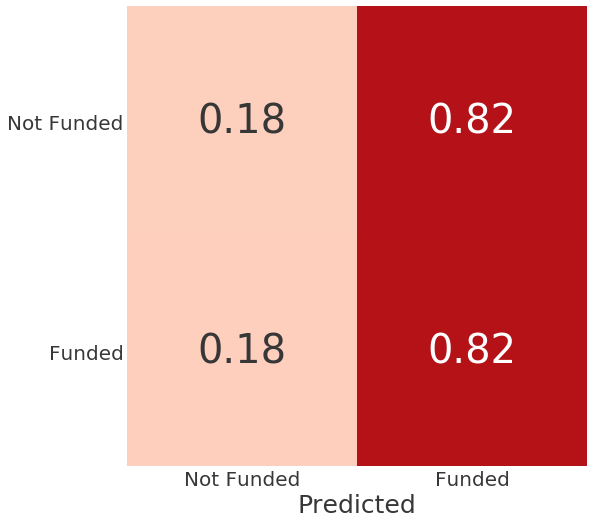

In [61]:
plot_confusion_matrix(dummyconf, ['Not Funded', 'Funded'], normalize=True, cmap=plt.cm.Reds)

Confusion matrix, without normalization
[[  423  3751]
 [  260 18323]]


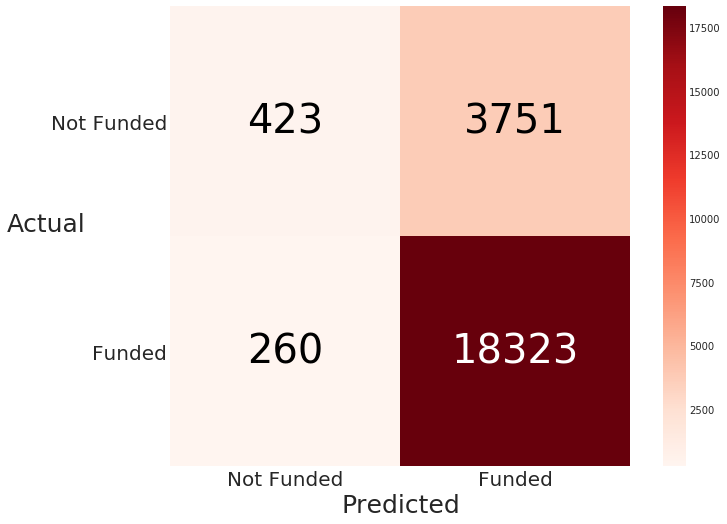

In [172]:
plot_confusion_matrix(gbconf, ['Not Funded', 'Funded'], normalize=False, cmap=plt.cm.Reds)